# Conversión de coordenadas celestes a Cartesianas

In [1]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sign(n: float)->int:
    return 1 if n >= 0 else -1

def segToRad(h: int, m: int, s: float)->float:
    sgn = sign(h)
    return (h*(pi/12) + sgn*m*(pi/720) + sgn*s*(pi/43200))

In [3]:
segToRad(-60,50,15.0992)

-15.927227469258327

In [4]:
def celestialToCartesian(rightAsc: tuple, dec: tuple, d: float)->tuple:
    theta = segToRad(rightAsc[0], rightAsc[1], rightAsc[2])
    phi = segToRad(dec[0], dec[1], dec[2])
    return (
        d*sin(phi)*cos(theta),
        d*sin(phi)*sin(theta),
        d*cos(phi)
    )

In [5]:
# Alpha Centauri
# Right Ascension: 14h 39' 35.06311"
# Declination: -60h 50' 15.0992"
celestialToCartesian((14,39,35.06311),(-60,50,15.0992),4.344)

(-0.7249125958022918, -0.6060370964255842, -4.239994901671844)

Text(-0.6249125958022919, -0.6060370964255842, 'α Centauri')

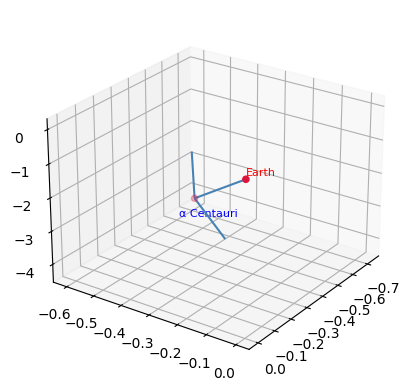

In [12]:
vec = celestialToCartesian((14,39,35.06311),(-60,50,15.0992),4.344)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.view_init(25, 35)
ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='steelblue')
ax.scatter(xs = [0, vec[0]], ys= [0, vec[1]], zs=[0, vec[2]], color='crimson')
ax.text(0,0,0.1,  'Earth', size=8, zorder=1,  color='#ff0000') 
ax.text(vec[0]+0.1, vec[1], vec[2]-0.3,  'α Centauri', size=8, zorder=1,  color='#0000ff') 

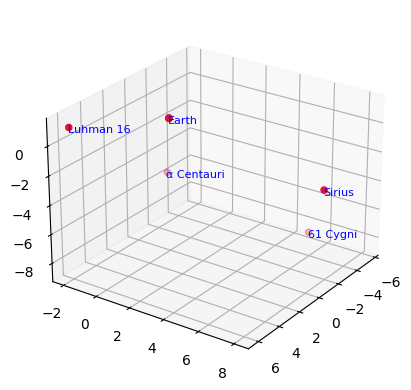

In [16]:
stars = [
    [(0,0,0),(0,0,0),0,"Earth"],
    [(14,39,35.06311),(-60,50,15.0992),4.344,"α Centauri"],
    [(10, 49, 18.723),(-53, 19, 09.86),6.503,"Luhman 16"],
    [(21, 6, 53.9396),(38, 44, 57.902),11.4039,"61 Cygni"],
    [(6, 45, 08.917),(-16, 42, 58.02),8.7094, "Sirius"]
]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.view_init(25, 35)
for i in range(0, len(stars)):
    vec = celestialToCartesian(stars[i][0],stars[i][1],stars[i][2])
    ax.scatter(xs = [0, vec[0]], ys= [0, vec[1]], zs=[0, vec[2]], color='crimson')
    ax.text(vec[0]+0.1, vec[1], vec[2]-0.3,  stars[i][3], size=8, zorder=10,  color='#0000ff')